In [2]:
from sklearn.cluster import KMeans,MiniBatchKMeans,BisectingKMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score,)

In [3]:
#this is for ignore all warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset 
data=pd.read_csv('data.csv')
data

,X,Y
0,516.012706,393.014514
1,436.211762,408.656585
2,512.052601,372.022014
3,489.140464,401.807159
4,446.207986,338.516682
...,...,...
331,638.916471,323.569096
332,542.005901,347.527070
333,611.964612,377.254978
334,520.654168,455.996453


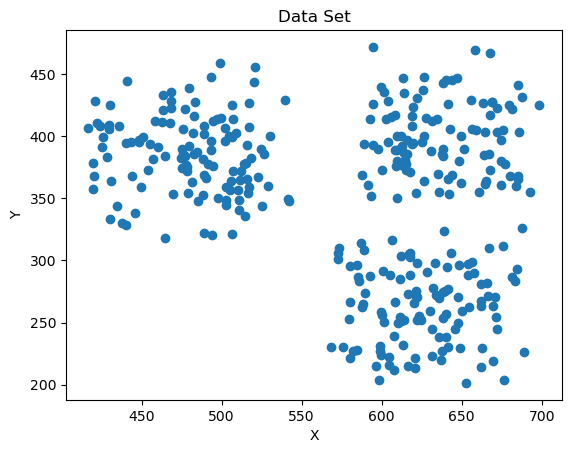

In [55]:
#plot the dataset
plt.scatter(data['X'],data['Y'])
plt.title('Data Set')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

##### K-means algorithm:
the main aims to of this algorithm is to group similar data points together and discover underlying patterns. The algorithm iteratively assigns each data point to the nearest centroid and updates the centroids based on the mean of the assigned points, This process continues until convergence, where centroids no longer change significantly, we can use different equations to calculate the distance between centroids and the data points. K-means requires a specific number of clusters (K) , we can use the elbow methode to find the optimal number of cluster.

In [56]:
# using the elbow methode to find the optimal number of cluster
n_cluster=range(1,10)
sse=[]
for k in n_cluster:
    model=KMeans(n_clusters=k)
    model.fit(data)
    sse.append(model.inertia_)


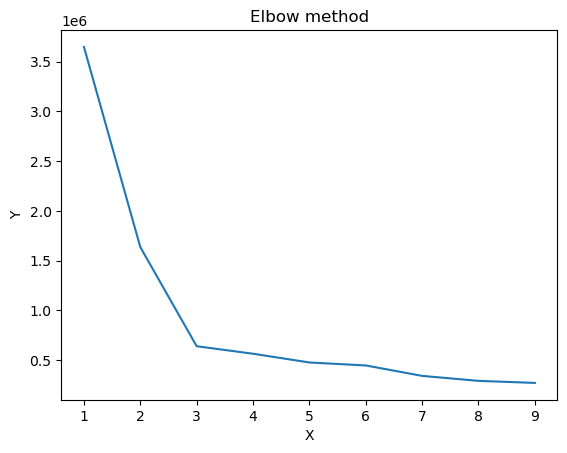

In [57]:
plt.plot(n_cluster,sse)
plt.title('Elbow method')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [58]:
# in this function we try to evaluate the kmeans algorithm with different metrices to find the optimal number of cluster
def evaluate_kmeans(data, n_clusters: list)->tuple:
    silhouette,davies_bouldin,calinski_harabasz = [],[],[]
    for k in n_clusters:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=k,init='k-means++')
        cluster_labels = clusterer.fit_predict(data)

        silhouette.append(round(silhouette_score(data, cluster_labels),4))
        davies_bouldin.append(round(davies_bouldin_score(data, cluster_labels),4))
        calinski_harabasz.append(round(calinski_harabasz_score(data, cluster_labels),4))
    return (silhouette,davies_bouldin,calinski_harabasz)


In [59]:
n_clusters = range(2,10)
results = evaluate_kmeans(data, n_clusters)

##### lets plot the results of the evaluation

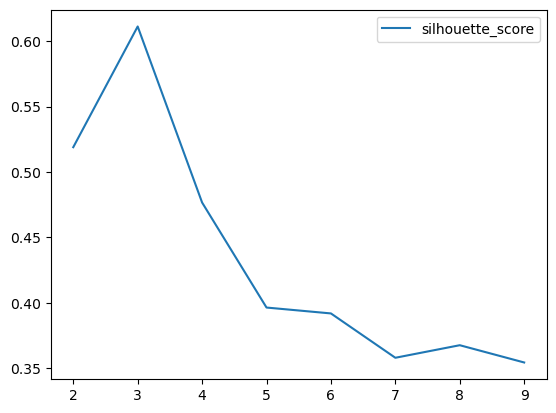

In [60]:
"""The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. 
It ranges from -1 to 1, where higher values indicate better clustering."""

plt.plot(n_clusters,results[0],label='silhouette_score')
plt.legend()
plt.show()

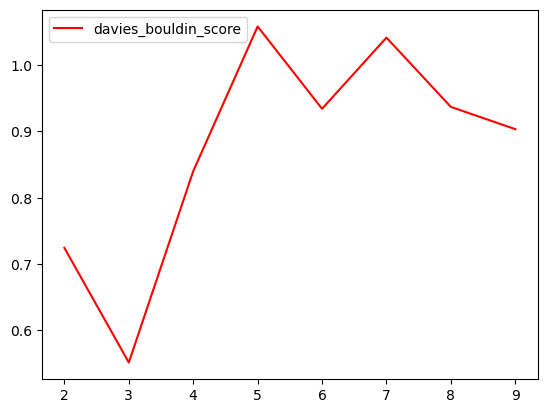

In [61]:
"""The Davies-Bouldin Index is the average similarity ratio of each cluster with 
its most similar cluster, where lower values indicate better clustering."""

plt.plot(n_clusters,results[1],label='davies_bouldin_score',color='red')
plt.legend()
plt.show()


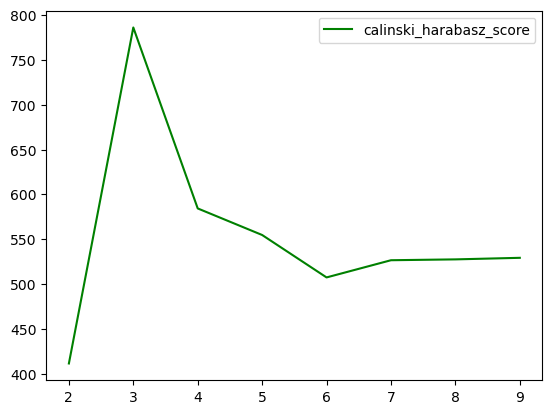

In [62]:
"""The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, is the ratio of 
the sum of between-cluster dispersion and within-cluster dispersion. Higher values indicate better clustering."""

plt.plot(n_clusters,results[2],label='calinski_harabasz_score',color='green')
plt.legend()
plt.show()

In [68]:
# based on the results the optimal number of clusters is 3
cluster = KMeans(n_clusters=3,init='k-means++')
cluster_labels = cluster.fit_predict(data)
print("the best silhouette_score =", round(silhouette_score(data, cluster_labels),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, cluster_labels),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, cluster_labels),4))
   


the best silhouette_score = 0.6113
the best davies_bouldin_score = 0.5513
the best calinski_harabasz_score = 786.0711


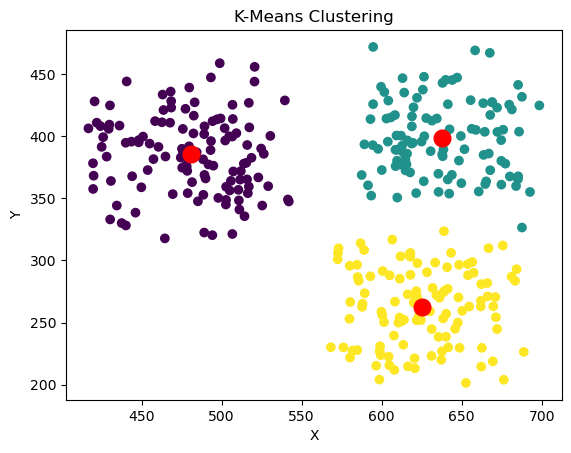

In [71]:
# plot the cluster 

plt.scatter(data['X'],data['Y'],c=cluster_labels)
plt.scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], 
            c='red', marker='o', s=100, linewidths=3, label='Cluster Centers')
plt.title('K-Means Clustering')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

##### Bisecting K-means
- Bisecting K-means clustering is a hierarchical clustering algorithm that combines aspects of both divisive and partitional clustering methods. The algorithm is generally more efficient and scalable compared to the traditional hierarchical methods and often produces better clustering results than standard K-means.

In [60]:
# initialize and fit the Bisecting KMeans model
bisect_Kmeans = BisectingKMeans(n_clusters=3,init='k-means++')
cluster_labels=bisect_Kmeans.fit_predict(data)
print("the best silhouette_score =", round(silhouette_score(data, cluster_labels),4))
print("the best davies_bouldin_score =", round(davies_bouldin_score(data, cluster_labels),4))
print("the best calinski_harabasz_score =", round(calinski_harabasz_score(data, cluster_labels),4))

the best silhouette_score = 0.6076
the best davies_bouldin_score = 0.5525
the best calinski_harabasz_score = 766.9885


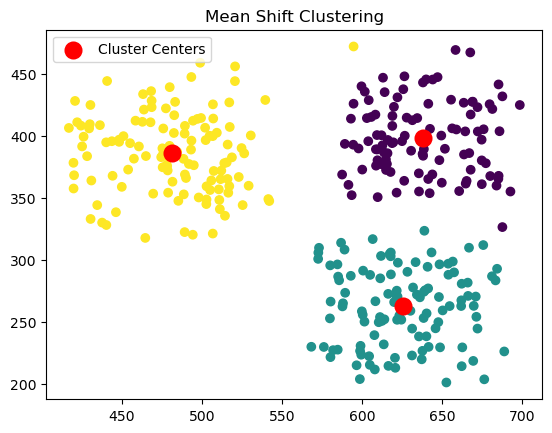

In [61]:
plt.scatter(data['X'], data['Y'], c=cluster_labels)
plt.title('Mean Shift Clustering')
plt.scatter(bisect_Kmeans.cluster_centers_[:, 0], bisect_Kmeans.cluster_centers_[:, 1], 
            c='red', marker='o', s=100, linewidths=3, label='Cluster Centers')
plt.legend()
plt.show()